In [1]:
# --------
# Потанин Богдан Станиславович
# Математическая Статистика в Python
# Урок 3. Генерация выборок из распределений
# --------

# --------
# Часть №1. Генерация выборки из
#           равномерного распределения
# --------
import numpy as np
# Два подхода к формированию случайных чисел.
# 1. Случайный. За основу берется результат некоторого непредсказуемого
#    физического процесса. На данный момент этот подход весьма
#    ресурсозатратен и поэтому применяется относительно редко.
# 2. Псевдослучайный. За основу берется одно число, полученное случайным
#    образом, например, исходя из времени на внутренних часах компьютера,
#    а затем из него, в соответствии с заранее заданным алгоритмом,
#    генерируются другие случайные числа из того же распределения.
# Большинство приложений и библиотек предполагают применение
# пвсевдослучайного подхода. В дальнейшем будем пользоваться лишь им.

print(np.random.rand())                                  # сгенерируем случайное число из стандартного
                                                         # равномерного распределения
np.random.seed(123)                                      # установим заранее зерно, из которого будет осуществляться
print(np.random.rand())                                  # генерация и убедимся, что в таком случае результат не случаен

# Сформируем выборку из стандартного равномерного
# распределения, то есть из U~(0, 1)
np.random.seed(123)                                     # для воспроизводимости результатов, полученных с использованием
                                                        # выборок, необходима установка случайного зерна
n = 1000
u = np.random.uniform(size = n,                         # объем выборки
                      low = 0,                          # наименьшее значение
                      high = 1)                         # наибольшее значение
print(u)                                                # реализация выборки из U~(0,1) объемом n

# Посмотрим, как работает ЗБЧ
np.mean(u)                                              # примерно равно E(U) = 0.5
np.mean(u <= 0.35)                                      # примерно равно P(U <= 0.35) = 0.35
np.mean(u ** 2)                                         # примерно равно E(U ^ 2)
# Чем больше объем выборки, тем, в силу ЗБЧ,
# с меньшей вероятностью данные значения будут
# сильно отличаться от истинных

# Посмотрим, как с объемом выборки меняется
# точность аппроксимации E(U):
np.random.seed(333333)
n_new = 100000                                          # объем новой выборки из U~(0,1)
u_new = np.random.uniform(size = n_new)                 # создадим новую большую выборку
step = 10                                               # разобьем эту большую выборку на
                                                        # подвыборки, первая из которых
                                                        # имеет объем step, а каждая следующая
                                                        # на step больше предыдущей
m = int(len(u_new) / step)                              # количество таких выборок
u_mean = np.zeros(m)                                    # здесь будем сохраняться аппроксимацию E(U), полученную
                                                        # на каждой из подвыборок
for i in range(0, m):
    u_mean[i] = np.mean(u_new[0:((i + 1) * step - 1)])  # аппроксимируем E(U) на очередной подвыборке
dev = abs(u_mean - 0.5)                                 # считаем абсолютные отклонения аппроксимации
                                                        # от истинного значения: вспомним, что E(U) = 0.5
# Визуализируем результат
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(U) - mean(u)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.plot(dev, 'ro', markersize = 1)
# Вывод: по мере увеличения объемов
# подвыборки вероятность отклоения аппроксимации
# от истины уменьшается и стремится к нулю.
# Примечание: вместо подвыборок можно было бы
# использовать новые выборки, но это существенно
# увеличило бы вычислительную нагрузку.



# --------
# Часть №2. Генерация выборки из дискретного
#           распределения с конечным носителем
# --------

# Пусть случайная величина Y имеет следующую таблицу распределения:
# t         |   -3   |   0   |   3    |   5    |  8
# P(Y = t)  |   0.1  |   0.2 |   0.3  |  0.35  | 0.05

# Создадим переменные, отражающие некоторые
# характеристики данного распределения.
# Пусть здесь и далее t принадлежит supp(Y):
t_y = np.array([-3, 0, 3, 5, 8])                         # supp(Y)          - носитель
p_y = np.array([0.1, 0.2, 0.3, 0.35, 0.05])              # P(Y = t),        - функция вероятности
F_y = np.cumsum(p_y)                                     # P(Y <= t) = F(Y) - функция распределения
print(pd.DataFrame(                                      # визуализируем результат
    {'t': t_y,
     'P(Y = t)': p_y,
     'P(Y <= t)': F_y}))

# Вспомним, как выбирать элементы вектора
# по логическому вектору
is_select = t_y > 0                                      # получаем логический (bool) вектор
print(is_select)
print(p_y[is_select])                                    # выбираем те значения из вектора вероятностей,
                                                         # которые соответствуют условию, то есть берем
                                                         # лишь те элементы вектора 'p_y', для которых соответствующие
                                                         # элементы вектора 'is_select' равняются 'True'
print(p_y[[True, False, True, False, True]])             # еще нескольких скохих примеров
print(p_y[(t_y > 0) & (t_y < 6)])

# Сгенерируем выборку из распредедения такого
# же, как у случайной величины Y.
y = np.zeros(n)                                          # создадим вектор, в котором будем сохранять
                                                         # реализации выборки
# Найдем реализации из распределения случайной величины
# Y используя реализации из стандартного равномерного
# распределения U~(0,1).
# При формировании выборки из Y необходимо, чтобы
# каждое из возможных значений t появлялось в ней
# с соответствующей вероятностью P(Y = t).
# Обратим внимание, что:
# P(Y = -3) = 0.1 = P(U <= 0.1).
# Следовательно, присваивать в выборке из Y значения -3
# нужно с такой же вероятностью, как в выборке из U
# возникают значения меньше 0.1. А значит достаточно в
# выборке из Y везде поставить -3, где в выборке из U
# фигурирует число меньше 0.1.
y[u <= F_y[0]] = t_y[0]
# Вновь обратим внимание, что:
# P(Y = 0) = P(Y <= 0) - P(Y <= -3) = 0.3 - 0.1 = P(0.1 <= U <= 0.3)
# Седовательно, присваивать в выборке из Y значения 0
# нужно с такой же вероятностью, как в выборке из U
# возникают значения между 0.3 и 0.1. А значит достаточно в
# выборке из Y везде поставить 0, где в выборке из U
# фигурирует число от 0.1 до 0.3.
y[(u >= F_y[0]) & (u <= F_y[1])] = t_y[1]
# Поступаем по аналогии для остальных значений
for i in range(2, len(t_y)):
    y[(u >= F_y[i - 1]) & (u <= F_y[i])] = t_y[i]

# --------
# Часть №3. Генерация выборки из
#           непрерывного распределения
#           с квантильной функцией
# --------

# Квантильная функция это функция, обратная функции распределения.
# Если для некоторого распределения она существует, то получить
# выборку из этого распределения можно при помощи метода обратного
# преобразования (inverse transform sampling).

# Рассмотрим случайную величину X со
# следующей функцией плотности:
def f_X(x):                            # создаем функцию "f_X" принимающую в качестве аргумента "x"
    if (x >= 7) & (x <= 10):           # если аргумент принадлежит носителю X, то есть интервалу [7, 10],
        value = (1 / 219) * (x ** 2)   # то осуществляем расчет,
        return value                   # и возвращаем полученный результат,
    return 0                           # а в противном случае возвращаем 0


# Рассчитаем значение данной функции
# плотности в нескольких точках:
f_X(8)                                 # осуществим рассчет в точке, принадлежащей носителю X
f_X(5)                                 # получим 0, поскольку x < 7  (при x = 5)
f_X(12)                                # получим 0, поскольку x > 10 (при x = 12)

# Теперь запрограммируем функцию распределения
# случайной величины X:
def F_X(x):
    if (x < 7):                         # возвращаем 0, если x < 7
        return 0
    if (x >= 7) & (x <= 10):            # если аргумент функции распределения принадлежит
                                        # носителю x, то осуществляем данный расчет
        return (1 / 657) * \
               (x ** 3 - 343)
    return 1                            # возвращаем 1, если x > 10

# При помощи запрограмированной функции
# распределения осуществим следующие
# расчеты:
F_X(5)                                  # полуем 0, поскольку x < 7
F_X(12)                                 # полуем 1, поскольку x > 10
F_X(9)                                  # P(X < 9)

# Наконец, запрограммируем квантильную
# функцию, то есть если на вход подать
# значение x, то на выходе функция выдаст
# такое число y, что P(X <= y) = x:
def q_X(x):
        return (657 * x + 343) ** (1 / 3)

# Проверим, что квантильная функция
# работает корректно:
q_X(0.3)                                   # находим квантиль уровня 0.3
F_X(q_X(0.3))                              # получили вновь 0.3, значит все работает верно

# Сгенерируем выборку из X используя метод
# обратного преобразования
x = q_X(u)

# Сравним истинные значения функции
# распределения и рассчитываемые
# при помощи ЗБЧ
F_X(8)                                     # P(X <= 8)
np.mean(x <= 8)                            # приблизительное значение P(X <= 8)

# --------
# Часть №4. Генерация выборок из
#           известных распределений
# --------

# Выборка из Хи-Квадрат распределения
# с 5-ю степенями свободы
chi2.rvs(size = 1000,                      # объем выборки
         df = 5)                           # число степеней свободы

# Выборка из распределения Стьюдента
# с 5-ю степенями свободы
t.rvs(size = 1000,                         # объем выборки
      df = 5)                              # число степеней свободы

# Выборка из распределения Фишера
# с 5-ю и 10-ю степенями свободы
f.rvs(size = 1000,                         # объем выборки
      dfn = 5,                             # первое число степеней свободы
      dfd = 10)                            # второе число степеней свободы

# Выборка из нормального распределения
# с математическим ожиданием 5 и
# дисперсией 10
norm.rvs(size = 1000,                      # объем выборки
         loc = 5,                          # первое число степеней свободы
         scale = 10)                       # второе число степеней свободы

# Выборка из распределения Пуассона
# с параметром lambda = 5
poisson.rvs(size = 1000,                   # объем выборки
            mu = 5)                        # лямбда

# Выборка из Биномиального распределения
# с параметром 0.6 и 10
binom.rvs(size = 1000,                     # объем выборки
          n = 10,                          # число независимых испытаний Бернулли
          p = 0.6)                         # вероятность успеха в одном испытании

# Задания

0.42369772434731556
0.6964691855978616
[6.96469186e-01 2.86139335e-01 2.26851454e-01 5.51314769e-01
 7.19468970e-01 4.23106460e-01 9.80764198e-01 6.84829739e-01
 4.80931901e-01 3.92117518e-01 3.43178016e-01 7.29049707e-01
 4.38572245e-01 5.96778966e-02 3.98044255e-01 7.37995406e-01
 1.82491730e-01 1.75451756e-01 5.31551374e-01 5.31827587e-01
 6.34400959e-01 8.49431794e-01 7.24455325e-01 6.11023511e-01
 7.22443383e-01 3.22958914e-01 3.61788656e-01 2.28263231e-01
 2.93714046e-01 6.30976124e-01 9.21049399e-02 4.33701173e-01
 4.30862763e-01 4.93685098e-01 4.25830290e-01 3.12261223e-01
 4.26351307e-01 8.93389163e-01 9.44160018e-01 5.01836676e-01
 6.23952952e-01 1.15618395e-01 3.17285482e-01 4.14826212e-01
 8.66309158e-01 2.50455365e-01 4.83034264e-01 9.85559786e-01
 5.19485119e-01 6.12894526e-01 1.20628666e-01 8.26340801e-01
 6.03060128e-01 5.45068006e-01 3.42763834e-01 3.04120789e-01
 4.17022211e-01 6.81300766e-01 8.75456842e-01 5.10422337e-01
 6.69313783e-01 5.85936553e-01 6.24903502e-01 

NameError: name 'plt' is not defined

In [34]:

import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, geom

In [12]:
np.set_printoptions(suppress = True)                      # уберем scientific notation

### Задание 1 ##

In [13]:
# 1. Симулируйте выборку объемом в 10000
#    наблюдений из распределения:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25

In [14]:
# Выборка из Хи-Квадрат распределения
# с 5-ю степенями свободы
chi2.rvs(size = 10000,                      # объем выборки
         df = 5)                           # число степеней свободы

array([ 2.92858137,  7.70647984,  0.63419868, ...,  3.58843137,
       15.96903335, 10.09009675])

In [15]:
# Выборка из распределения Стьюдента
# с 10-ю степенями свободы
t.rvs(size = 10000,                         # объем выборки
      df = 10)                              # число степеней свободы


array([ 0.46552162, -0.69986147,  0.65421914, ..., -0.13990937,
       -0.81970117, -0.05466812])

In [16]:
# Выборка из нормального распределения
# с математическим ожиданием 10 и
# дисперсией 25
norm.rvs(size = 10000,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 25)                       # второе число степеней свободы

array([  3.06699252,  19.69991095, -34.86401433, ...,   5.57742726,
         3.08791839,  33.19946237])

### Задание 2 ###


In [17]:
# 2. Симулируйте выборку из Хи-Квадрат распределения
#    с 10-ю степенями свободы. При помощи ЗБЧ найдите
#    аппроксимации:
#    1)    E(X)
#    2)    E(X ^ 3)
#    2)    Var(X)
#    3*)   Median(X)
#    4)    P(X <= 1.7)
#    5*)   квантиль X уровня 0.3
#    6)    Var(sin(X))

In [18]:
np.random.seed(72)                                     
n = 10000000
u = np.random.chisquare(df=10,size = n)                 
print(u)   


[10.77836303  6.69440755 18.60011778 ...  5.9354251   4.33165038
  8.43783175]


In [19]:
print(np.mean(u),np.mean(u ** 3),np.var(u),np.median(u),np.mean(u <= 1.7),
      np.quantile(u, 0.3),np.var(np.sin(u)))


9.99925249245868 1679.7273932125404 19.997831280229835 9.339573724192498 0.0018035 7.2660767502759285 0.4994386348183087


### Задание 3 ###

In [20]:
# 3. Пусть X и Y независимые случайные величины, причем
#    X~U(1,5) и Y~chi2(5). При помощи ЗБЧ аппроксимируйте:
#    1)    E(X + Y)
#    2)    P(X - Y <= 2)
#    3)    Var(X / Y)

In [21]:
n = 1000000
np.random.seed(72)   
u = np.random.uniform(size = n,                         
                      low = 1,                    
                      high = 5)                      
EX = np.mean(u) 
                                  
n = 1000000
chi = np.random.chisquare(df=5,size = n)                 
EY = np.mean(chi)  
#1
print(EY+EX)
#2
print(np.mean(u - chi <= 2))
#3
print(np.var(u/chi))

8.002674412135855
0.918594
2.286154996656628


  ### Задание 4 ###

In [22]:
# 4. В предыдущих задачах постройте графики, демонстрирующие,
#    что вероятность отклонения аппроксимаций от истинных
#    значений снижается по мере увеличения объема выборки.
#    В качестве метрики используйте:
#    1*)   Абсолютное отклонение
#    2*)   Квадрат абсолютного отклонения

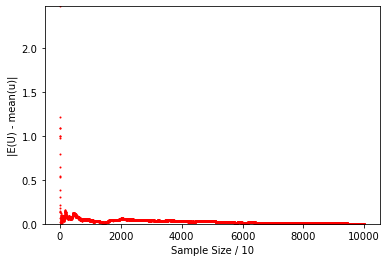

In [23]:
np.random.seed(72)
n_new = 100000                                          
u_new = np.random.uniform(size = n_new, low = 1, high =5)                 
step = 10                                                          
n = 100000
chi = np.random.chisquare(df=5,size = n)                                              
m = int(len(u_new+chi) / step)                         
u_mean = np.zeros(m)                            
summ = u_new+chi                                       
for i in range(0, m):
    u_mean[i] = np.mean(summ[0:((i + 1) * step - 1)])  
dev = abs(u_mean - 8)                                 
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(U) - mean(u)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.plot(dev, 'ro', markersize = 1)

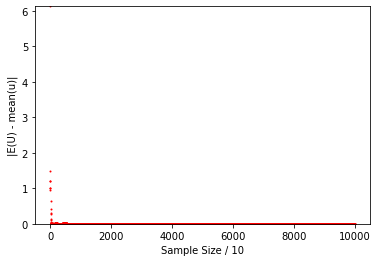

In [24]:
np.random.seed(72)
n_new = 100000                                          
u_new = np.random.uniform(size = n_new, low = 1, high =5)                 
step = 10                                                             
n = 100000
chi = np.random.chisquare(df=5,size = n)                                                        
m = int(len(u_new+chi) / step)                          
u_mean = np.zeros(m)                                    
summ = u_new+chi                                            
for i in range(0, m):
    u_mean[i] = np.mean(summ[0:((i + 1) * step - 1)])  
dev = (u_mean - 8)**2                       
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(U) - mean(u)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.plot(dev, 'ro', markersize = 1)

### Задание 5

In [25]:
# 5. Не используя встроенные функции симулируйте выборку из:

In [26]:
#    1)    Распределения Бернулли с параметром p = 0.3
s = []
a = np.arange(2)
for i in range(100000):
    s.append(np.random.choice(a, p=[0.7,0.3]))
np.mean(s)

0.30099

In [27]:
#    2)    Биномиального распределения с
#          параметрами n = 5, p = 0.3 (используйте встроенную квантильную функцию)
brsp = binom(5, 0.3)
u = np.random.uniform(size = 100)     
vib = brsp.ppf(u)
vib.mean()

1.45

In [28]:
#    3)    Экспоненциального распределения с параметром lambda = 5
def q_X(p):
    return -math.log(1-p)/5
s = []
m = np.random.uniform(0, 1, 100000)
for i in m:
    s.append(q_X(i))
np.mean(s)

0.20045309948919363

In [29]:
#    4)    Нормального распределения с
#          параметрами mu = 5, sigma = 25 (используйте встроенную квантильную функцию)
u = np.random.uniform(size = 1000)  
vals = norm.ppf(u,loc = 5,  scale = 25)
vals.mean()

5.4177954124309995

In [35]:
#    5*)   Геометрического распределения с
#          вероятностью успеха 0.3
u = np.random.uniform(size = 1000)  
v = geom(p = 0.3).ppf(u)
v.mean()

3.241

In [36]:
#    6**)  Распределения Пуассона с математическим
#          ожидаем 5
u = np.random.uniform(size = 1000) 
v = poisson(5).ppf(u)
v.mean()

5.073

In [37]:
#    7**)  Суммы распределений из предыдущих двух пунктов,
#          предполагая независимость.

In [38]:
u = np.random.uniform(size = 1000)  

In [39]:
v1 = geom(p = 0.3).ppf(u)+poisson(5).ppf(u)
v1.mean()

8.733